<a href="https://colab.research.google.com/github/night-spring/Machine-Learning-Lab--PCC-AIML-592/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📚***Linear Regression with NumPy and scikit-learn***

> **Objective:** To implement and understand linear regression through various approaches and connect theory with practice.



# 📘 Understand and Explain the Theory



---


📑 **What is linear regression?**

> *Linear regression* is a machine learning algorithm used to predict a continuous output variable (also known as label) based on a linear relationship with one or more input variables (also known as features).

📑 **How is the relationship between dependent and independent variables modeled?**

> It aims to find the best-fitting *straight line* (or hyperplane in higher dimensions) that represents the relationship between the variables.


📑 **Derivation and meaning.**

> **1. Hypothesis function:**
\
&emsp;&emsp;&emsp; $h_θ(x) = θ₀ + θ₁x1+ …+ θn xn = θ^Tx$
<br>&emsp; This function gives the *predicted value* of the dependent variable for input 𝑥.
\
\
 **• Cost function (Mean Squared Error):**
\
&emsp;&emsp;&emsp; $J(θ) = \frac{1}{2m} \sum_{i=1}^{m} \left(h_θ(x^{(i)}) - y^{(i)}\right)^2$
<br>&emsp; Cost function measures the average squared difference between predicted and actual values. It quantifies the error of a model's predictions, with a lower MSE indicating a better fit.
\
\
 **• The Normal Equation:**
\
&emsp;&emsp;&emsp; $θ=(X^TX)^{-1}X^Ty$
<br>&emsp; The Normal Equation is a method for solving linear regression problems by directly calculating the optimal parameters (coefficients) that minimize the cost function, specifically the sum of squared errors
\
\
 **• Gradient Descent algorithm for iterative para:**
\
&emsp;&emsp;&emsp; $\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta)$
<br>&emsp; Gradient Descent is an iterative optimization algorithm widely used in machine learning to minimize a function, typically a cost or loss function.


📑 **A brief comparison of the Normal Equation and Gradient Descent.**

>**The Normal Equation** solves linear regression directly without iteration, making it fast for small datasets but computationally expensive for large ones due to matrix inversion.
\
&emsp;**Gradient Descent**, on the other hand, is an iterative method that scales well to large datasets but requires a learning rate and multiple iterations to converge. It is more flexible and better suited for high-dimensional data.

# 📗 Data Generation and Visualization

---



- Set random seed to ensure reproducibility
- Generate 100 random values (x) in a given range
- Create y values using a linear equation: y = slope * x + intercept + noise
- Plot the data points on a scatter plot


In [69]:
import numpy as np

# random seed & random vlues generated
seed = np.random.randint(1, 100, 1)[0]
np.random.seed(seed)
x = np.array(np.random.rand(100, 1))

# creating y values
slope = 2.5
intercept = 5
noise = np.random.randn(100, 1)
y = slope * x + intercept + noise

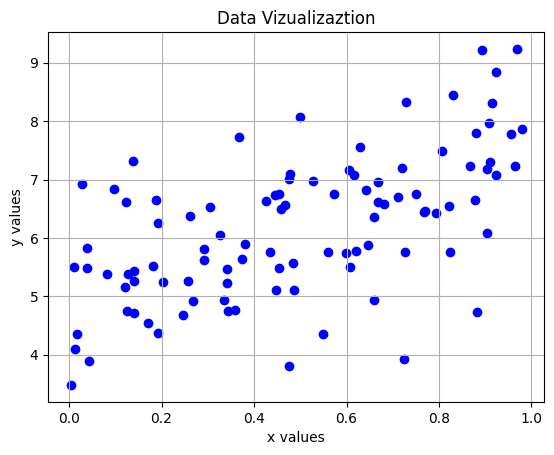

In [76]:
import matplotlib.pyplot as plt

# scatter plot
plt.scatter(x, y, color='blue')
plt.xlabel("x values")
plt.ylabel("y values")
plt.title("Data Vizualizaztion")
plt.grid(True)
plt.show()

# 📙 Solve Using the Normal Equation

---
- Add a bias term (column of ones) to the input data
- Compute theta using the Normal Equation:
 theta = inverse(transpose(X) * X) * transpose(X) * y
- Use theta to predict y for new inputs
- Plot the regression line over the original data


In [77]:
from sklearn.preprocessing import add_dummy_feature

# add x0
X = add_dummy_feature(x)

# compute theta
theta = np.linalg.inv(X.T @ X) @ X.T @ y

# preict y
y_pred = X @ theta

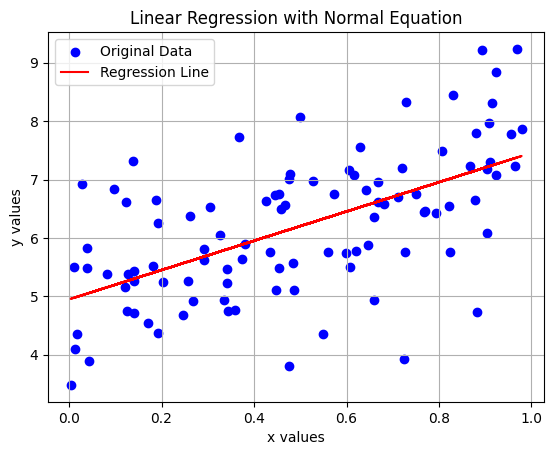

In [78]:
# plot regression line
plt.scatter(x, y, color='blue', label='Original Data')
plt.plot(x, y_pred, color='red', label='Regression Line')
plt.xlabel("x values")
plt.ylabel("y values")
plt.title("Linear Regression with Normal Equation")
plt.legend()
plt.grid(True)
plt.show()

# 📙 Use scikit-learn’s LinearRegression Model


---

- Initialize a LinearRegression model
- Fit the model on the training data (x, y)
- Extract intercept and slope
- Use the model to predict values for new x inputs

In [85]:
from sklearn.linear_model import LinearRegression

# init and fit model
model = LinearRegression()
model.fit(x, y)

# interception and slop2
intercept = model.intercept_
slope = model.coef_[0]

# predict y
y_pred = model.predict(x)

[4.94919621] [2.50727569]


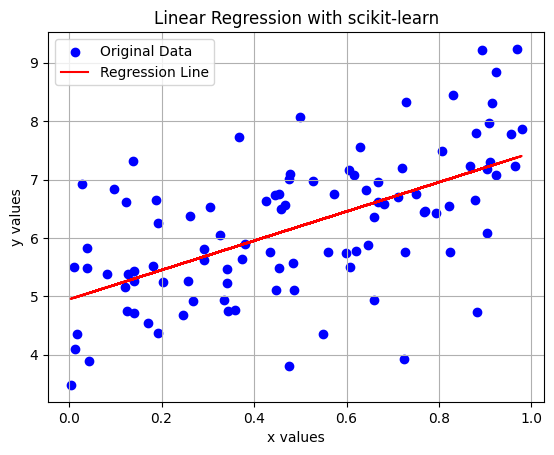

In [83]:
plt.scatter(x, y, color='blue', label='Original Data')
plt.plot(x, y_pred, color='red', label='Regression Line')
plt.xlabel("x values")
plt.ylabel("y values")
plt.title("Linear Regression with scikit-learn")
plt.legend()
plt.grid(True)
plt.show()

# 📕 Use Pseudo-Inverse and SVD (SVD-based Least Squares)

---

- Use lstsq function to compute theta and residuals
- Use pinv function to compute theta as: pinv(X) * y
- Compare theta values from all methods


In [97]:
# using lstsq
theta_lstsq = np.linalg.lstsq(X, y)[0]

# using pinv
theta_pinv = np.linalg.pinv(X) @ y

In [99]:
# Compare all theta values
print("Theta from normal eq.  :", theta.ravel())
print("Theta from lstsq       :", theta_lstsq.ravel())
print("Theta from pinv        :", theta_pinv.ravel())

Theta from normal eq.  : [4.94919621 2.50727569]
Theta from lstsq       : [4.94919621 2.50727569]
Theta from pinv        : [4.94919621 2.50727569]


# 📙 Implement Batch Gradient Descent from Scratch

---

- Initialize theta with small random values
- Set learning rate and number of iterations
- Repeat for the given number of epochs:
\
 • Calculate gradients: gradient = (2/m) * transpose(X) * (X * theta - y)
\
 • Update theta using gradient: theta = theta - learning_rate * gradient
- Return final theta

In [148]:
# initialize theta, set learning rate and number of iterations
theta_grad = np.array([[5], [2.5]])
learning_rate = 0.5
iterations = 10
m = len(x)

# calculate theta using gradient descent
for _ in range(iterations):
  gradient = (2 / m) * (X.T @ ((X @ theta_grad) - y))
  theta_grad -= learning_rate * gradient

# prediction values
y_pred_grad = X @ theta_grad

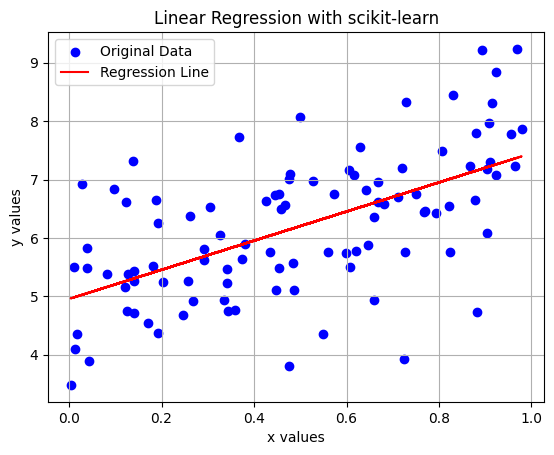

In [149]:
plt.scatter(x, y, color='blue', label='Original Data')
plt.plot(x, y_pred_grad, color='red', label='Regression Line')
plt.xlabel("x values")
plt.ylabel("y values")
plt.title("Linear Regression with scikit-learn")
plt.legend()
plt.grid(True)
plt.show()

# 📙 Use scikit-learn’s SGDRegressor

---

- Initialize an SGDRegressor model with:
\
 • learning rate
 \
 • max number of iterations
 \
 • no regularization (penalty=None)
- Fit the model on training data
- Extract the learned coefficients and intercept
- Predict values for new inputs

In [152]:
from sklearn.linear_model import SGDRegressor
# initialize model
model = SGDRegressor(penalty=None, max_iter=1000, alpha=0.0001)
model.fit(x, y.ravel())

# extract data
intercept = model.intercept_
slope = model.coef_
print(intercept, slope)

# prediction values
y_pred_sgd = model.predict(x)

[4.89894447] [2.55700412]


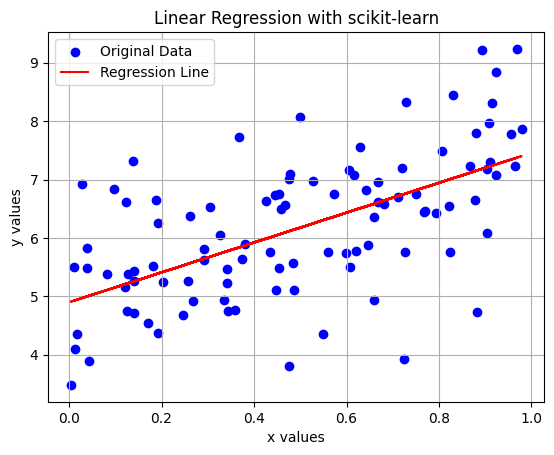

In [154]:
plt.scatter(x, y, color='blue', label='Original Data')
plt.plot(x, y_pred_sgd, color='red', label='Regression Line')
plt.xlabel("x values")
plt.ylabel("y values")
plt.title("Linear Regression with scikit-learn")
plt.legend()
plt.grid(True)
plt.show()

# 📓 Conclusion

---

In this lab, we explored different methods for linear regression.

*   **Normal Equation and scikit-learn's LinearRegression** gave us accurate results right away. These are great when you're working with smaller datasets and want something quick and simple.
*   **Pseudo-Inverse methods** is another reliable way to find the best-fit line using linear algebra.
*   **Batch Gradient Descent** used an iterative approach, gradually improving the solution with each step until convergence.
*   **scikit-learn’s SGDRegressor** showed a scalable iterative method suitable for larger datasets.

Overall, each method successfully produced a reliable linear fit. For smaller datasets, the Normal Equation or scikit-learn’s LinearRegression offer efficient and straightforward solutions. However, when working with larger datasets, SGDRegressor is better suited due to its scalability and ability to handle data in an iterative, memory-efficient manner.